# Laboratorium 8

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Zadanie 1

In [32]:
def wariancja(X):
    X = np.array(X)
    srednia = np.mean(X)
    suma = 0
    for i in range(len(X)):
        suma += ((X[i]-srednia)**2)
    return float(suma/(len(X)-1))

In [33]:
def kowariancja(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    if len(X)==len(Y):
        Xmean = np.mean(X)
        Ymean = np.mean(Y)
        sumaCov=0
        for i in range(len(X)):
            sumaCov+=((X[i]-Xmean)*(Y[i]-Ymean))
        return float(sumaCov/(len(X)-1))

In [34]:
def wspolczynnik(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    if len(X)==len(Y):
        kow = kowariancja(X,Y)
        wariancjaX = wariancja(X)
        wariancjaY = wariancja(Y)
    
    return float(kow/np.sqrt(wariancjaX*wariancjaY))

#### Zadanie 2

In [35]:
def prosta(X,Y):
    if len(X)==len(Y):
        a = kowariancja(X,Y)/wariancja(X)
        b = np.mean(Y) - (a * np.mean(X))
    return a,b

#### Zadanie 3

In [36]:
df = pd.read_html("https://www.naukowiec.org/wiedza/statystyka/kwartet-anscombe-a_3440.html")
df = df[0]
df.columns = ["x1","y1","x2","y2","x3","y3","x4","y4"]
df = df.loc[1:]
for i in range(1,5):
    df[f"x{i}"] = pd.to_numeric(df[f"x{i}"])
    df[f"y{i}"] = pd.to_numeric(df[f"y{i}"])
df

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


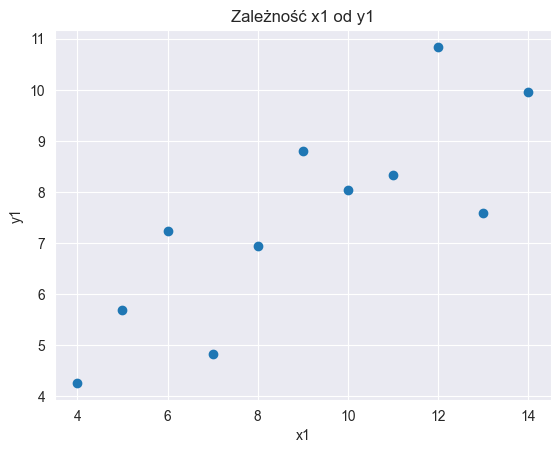

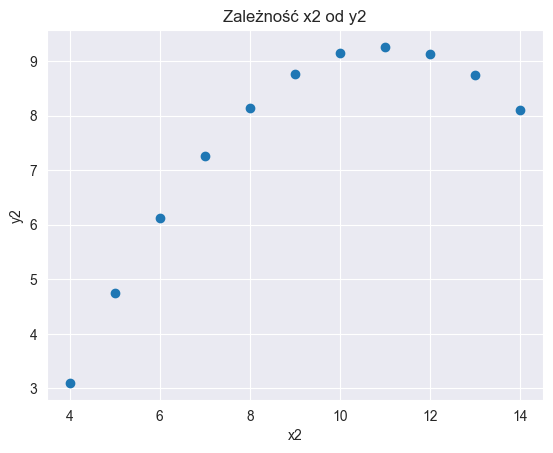

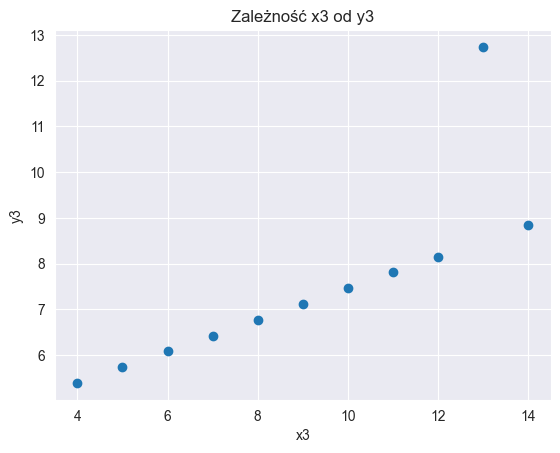

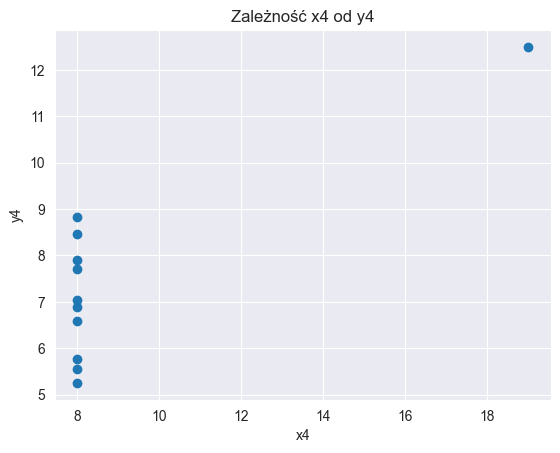

In [37]:
def rysuj():
    for i in range(1,5):
        daneX = df[f"x{i}"]
        daneY = df[f"y{i}"]
        plt.scatter(daneX,daneY,label=i)
        plt.title(f"Zależność x{i} od y{i}")
        plt.xlabel(f"x{i}")
        plt.ylabel(f"y{i}")
        plt.show()
rysuj()

#### Zadanie 4

In [38]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [39]:
# for i in range(1,5):
#     print(f"Współczynnik Pearsona dla x{i} oraz y{i} = {wspolczynnik(df[f"x{i}"],df[f"y{i}"])}")

wariancje = []
for i in range(1,5):
    wariancje.append(wariancja(df[f"x{i}"]))
    wariancje.append(wariancja(df[f"y{i}"]))
wariancje

[11.0,
 4.127269090909091,
 11.0,
 4.127629090909092,
 11.0,
 4.12262,
 11.0,
 4.123249090909091]

#### Wariancje i średnie są te same dla kolejnych xi oraz yi, więc współczynniki będą takie same

In [45]:
daneX = df[f"x1"]
daneY = df[f"y1"]
print(f"Wartość współczynnika Pearsona: {wspolczynnik(daneX,daneY):.3f}")

Wartość współczynnika Pearsona: 0.816


In [43]:
a,b = prosta(daneX,daneY)
print(f"y = {a:.1f}x + {b:.1f}")

y = 0.5x + 3.0


#### Zadanie 5


Model regresji dla x1 i y1:
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00217
Time:                        13:09:19   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001  

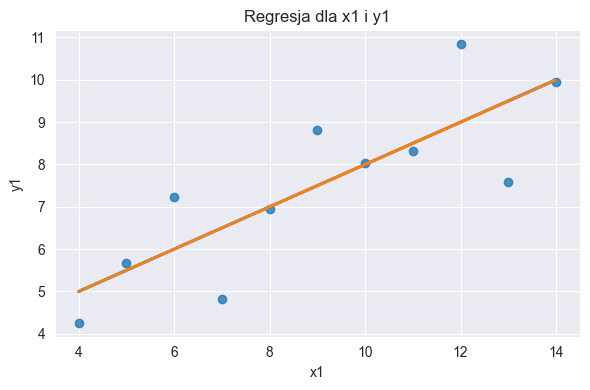


Model regresji dla x2 i y2:
                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00218
Time:                        13:09:19   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009  

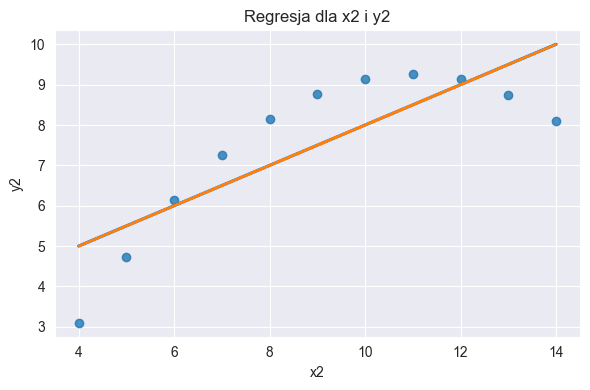


Model regresji dla x3 i y3:
                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00218
Time:                        13:09:20   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025  

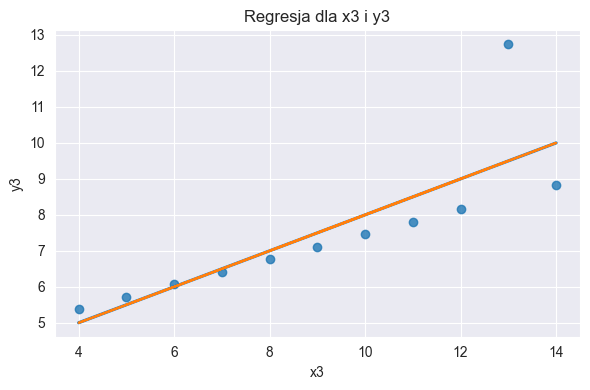


Model regresji dla x4 i y4:
                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00216
Time:                        13:09:20   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017  

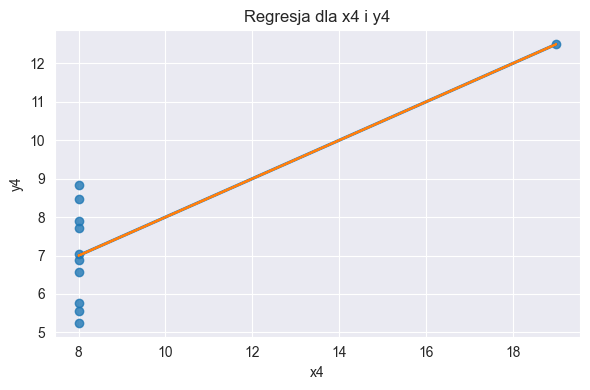

In [54]:
pary = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4")]

for xcol, ycol in pary:
    X = df[xcol]
    Y = df[ycol]

    X_sm = sm.add_constant(X)
    model = sm.OLS(Y, X_sm).fit()
    a = model.params.iloc[0]
    b = model.params.iloc[1]

    print(f"\nModel regresji dla {xcol} i {ycol}:")
    print(model.summary())
    
    plt.figure(figsize=(6,4))
    sns.regplot(x=X, y=Y, ci=None)

    xLine = X
    yLine = 0.5 * X + 3
    plt.plot(xLine, yLine)

    plt.title(f"Regresja dla {xcol} i {ycol}")
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.tight_layout()
    plt.show()